In [1]:
import os
import pandas as pd
from re import sub
from tqdm.notebook import tqdm
from functions import readSet, dirs
tqdm.pandas()

In [7]:
datasets = dirs('./data')
postags  = readSet('./wordlists/postags.txt')
ignoreCache = True

In [3]:
def cleanColumnName(name):
    name = sub(r'[^a-zA-Z]', '', name)
    name = name.lower()
    return name

In [5]:
def predictionclass(row):
    s = 0
    if row['sentiment'] == 'positive':
        s += 1
    if row['sentiment'] == row['predicted']:
        s += 2
    return s

In [8]:
for dataset in tqdm(datasets, desc="Datasets"):
    dataFile       = f'./data/{dataset}/Data-Cleaned.csv'
    dimensionsFile = f'./data/{dataset}/Dimensions.csv'
    predictionFile = f'./data/{dataset}/Word2Vec-Prediction.csv'
    outputFile     = f'./data/{dataset}/Stata-{dataset}.csv'

    if not os.path.exists(dataFile):
        raise ValueError(f"Dataset {dataset} has not been cleaned")
    if not os.path.exists(dimensionsFile):
        raise ValueError(f"Dimensions for {dataset} has not been calculated")
    if not os.path.exists(predictionFile):
        raise ValueError(f"Dataset {dataset} has not been predicted")

    if not os.path.exists(outputFile) or ignoreCache:
        data       = pd.read_csv(dataFile)
        dimensions = pd.read_csv(dimensionsFile)
        prediction = pd.read_csv(predictionFile)
        data = data[['text','sentiment']]
        prediction = prediction['predicted']
        dimensions = dimensions.drop(columns=list(postags))
        if 'words' in dimensions:
            dimensions = dimensions.drop(columns=['words', 'sentences'])

        output = pd.concat([data, prediction, dimensions], axis=1)
        output.columns = output.columns.map(cleanColumnName)
        output['predictionclass'] = output.progress_apply(corrclass, axis=1)
        output.to_csv(outputFile, index=False)

Datasets:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11541 [00:00<?, ?it/s]

  0%|          | 0/8897 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/1600000 [00:00<?, ?it/s]

array([[<AxesSubplot:title={'center':'predictionclass'}>]], dtype=object)

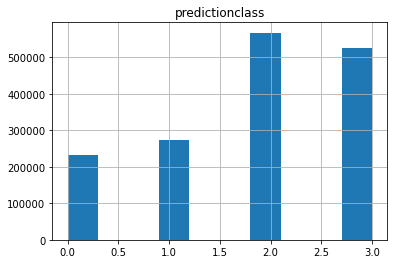

In [9]:
output.hist('predictionclass')